In [2]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

In [3]:
taxonomy = pd.read_csv('BirdCLEF/eBird_Taxonomy_v2021.csv')
metadata = pd.read_csv('BirdCLEF/train_metadata.csv')

In [7]:
metadata[metadata.primary_label == 'thrnig1'].common_name

13845    Thrush Nightingale
13846    Thrush Nightingale
13847    Thrush Nightingale
13848    Thrush Nightingale
13849    Thrush Nightingale
                ...        
14340    Thrush Nightingale
14341    Thrush Nightingale
14342    Thrush Nightingale
14343    Thrush Nightingale
14344    Thrush Nightingale
Name: common_name, Length: 500, dtype: object

In [5]:
sig,sr = librosa.load('BirdCLEF/train_audio/thrnig1/XC110336.ogg')

spec = librosa.feature.melspectrogram(y = sig, sr = sr,
    fmin = 150, n_fft = 512, hop_length = 130, n_mels = 80, norm = 100.0, power = 0.6)

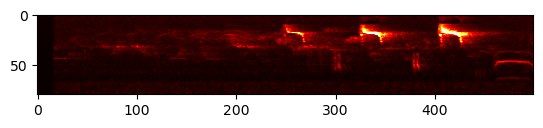

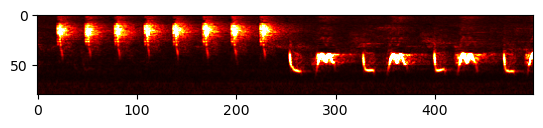

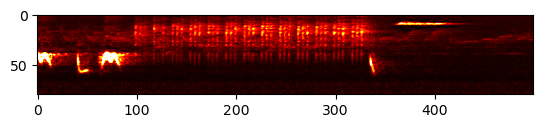

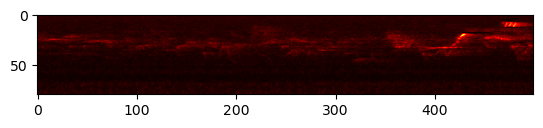

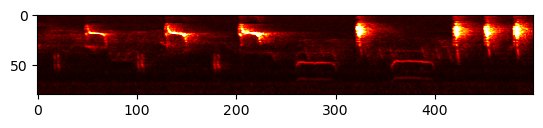

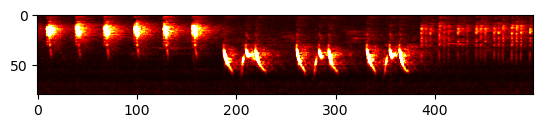

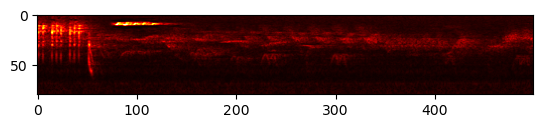

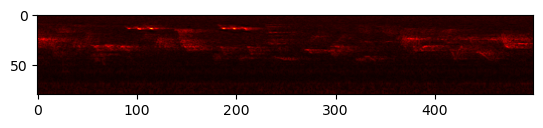

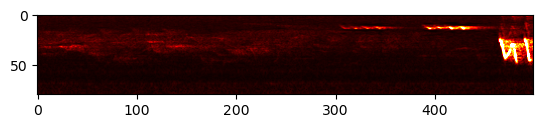

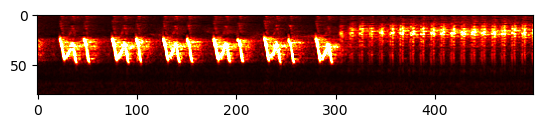

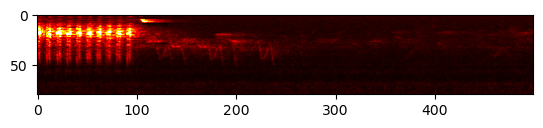

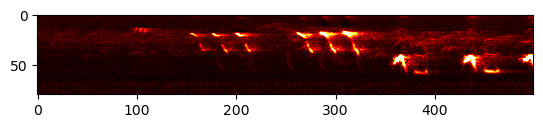

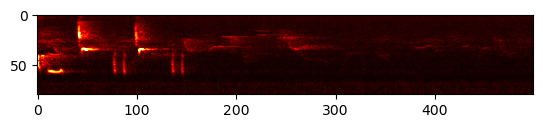

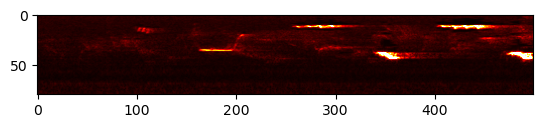

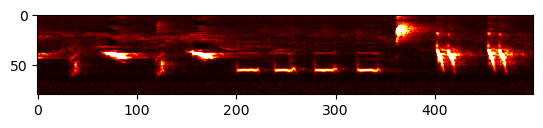

In [7]:
for i in range(15):
    plt.imshow(spec[::-1,i*500:(i+1)*500], cmap='hot', vmin=0, vmax=4)
    plt.show()

In [36]:
lens = []

for i, row in metadata.iterrows():
    filename = 'BirdCLEF/train_audio/%s' % row.filename
    
    clear_output(wait = True)
    print('reading file %d / %d: %s' % (i, len(metadata), row.filename))
    
    sig, _ = librosa.load('BirdCLEF/train_audio/%s' % row.filename)
    lens.append((len(sig), row.primary_label))

reading file 16940 / 16941: yewgre1/XC753190.ogg


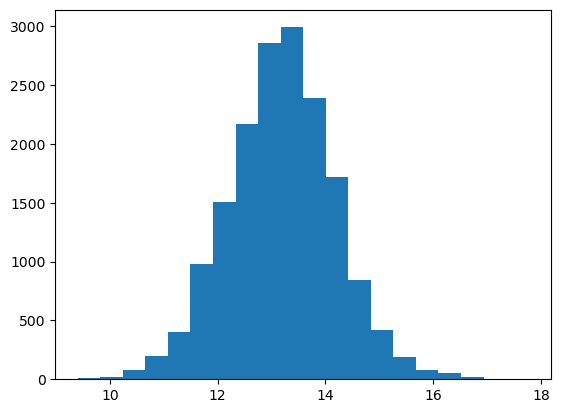

In [81]:
just_lens = np.array([l for l,s in lens])
plt.hist(np.log(just_lens), bins = 20)
plt.show()

In [82]:
np.sum(just_lens) / len(just_lens) / 22050

40.88558617402454

In [83]:
np.sort(just_lens)[len(just_lens) // 2] / 22050

24.624036281179137

In [84]:
np.quantile(just_lens, 0.99) / 22050 / 60

4.71787498110352

In [85]:
np.sort(just_lens)[0] / 22050

0.5480272108843537

In [87]:
np.sort(just_lens)[-1] / 22050 / 60

39.55880045351474